# Problem Statement:

Given a passenger, we will predict whether this person would have survived on the Titanic.

## Import Libraries

Let's get started with some libraries. We use inline to see the graphs in our jupyter notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## The Data

Let's read the data in the train file, and look at some basic information about the data's shape, look at the first 5 columns.

In [41]:
train = pd.read_csv('./data/train.csv')

In [25]:
train.shape

(891, 12)

In [43]:
clean_columns = [] 

def clean_column(col):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower()

for column in train.columns:
    print(column)
    if column == 'Pclass':
        clean_columns.append('p_class')
    else: clean_columns.append(clean_column(column))

train.columns = clean_columns

passenger_id
survived
p_class
name
sex
age
sib_sp
parch
ticket
fare
cabin
embarked


In [44]:
train.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data

Let's use some simple pandas functions to check the sum of null values and then visualize them via seaborn with a heatmap.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

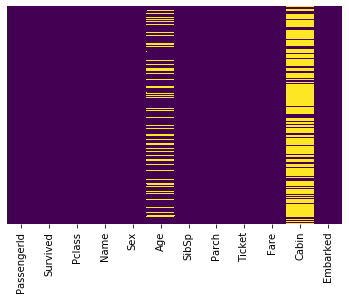

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. This proportion is likely small enough for reasonable replacement with some form of imputation.

The Cabin column however, seems to be missing so much data that it would be quite difficult to do something useful with it. Later we can either drop it or create dummy variables with whether the cabin is known or not. Let's now look at our dependent variable. Because this is a classification problem we can use a count plot to visualize this column.

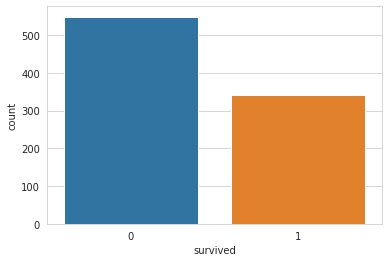

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data=train)

Now that we have this difference, we can start using our independent variables to see if we can see a correlation between those who survived and this variable.

In [ ]:
sns.set_style('whitegrid')

for column in train.columns:
    sns.countplot(x='survived', hue=column, data=train, palette='RdBu_r')